<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

In [46]:
import numpy as np
from matplotlib import pyplot as plt

### 1.1 Random numbers from the Normal distribution

In [3]:
# Your code here
# Normal distribution aka Gaussian distribution
# loc to specify mean
# scale to specify standard deviation

np.random.normal(loc=5, scale=2, size=10)

array([6.13492991, 8.53581774, 5.8286166 , 4.1679267 , 6.39241752,
       3.90084072, 5.69249281, 2.74610881, 6.12783387, 5.17010254])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

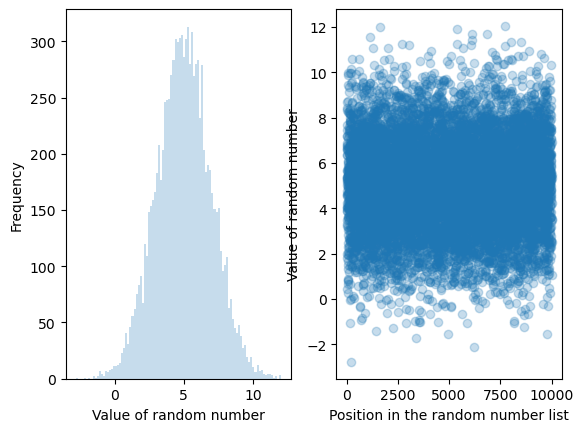

In [6]:
# Your code here

n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [7]:
# Your code here
# check if normal random numbers satisfy 68% condition in normal distribution

n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 67.69%


## 1 Brownian Motion in 1D

### 1.1 The scenario

In [ ]:
# Your code here
# simuulate particle moving in 1D
# one unit to left or right randomly
# probability of going right as p
# probability of going left as q = 1-p

### 1.2 The simulation

In [15]:
# Your code here

def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

In [10]:
import numpy.random as rnd

# to just use 'rnd' instead of np.random

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

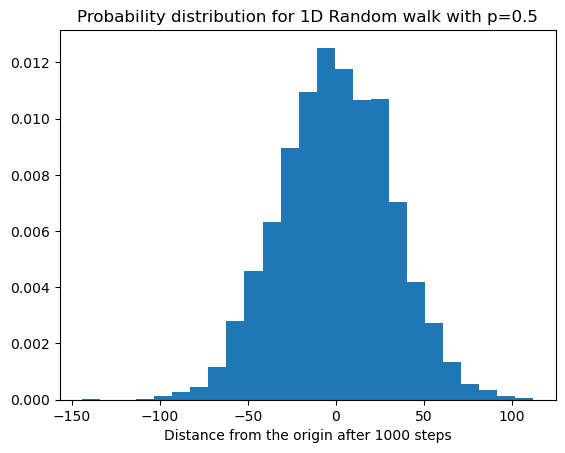

In [11]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

# density = True for matplotlib to normalise auc to 1

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.6')

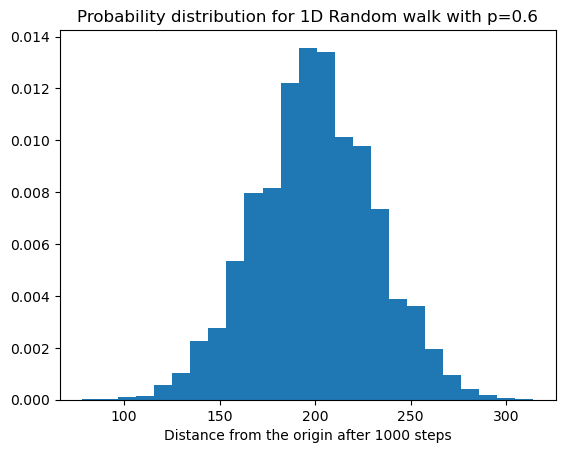

In [12]:
no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.3 What does theory say?

In [20]:
# Your code here

# distribution should have mean N(p-q)
# standard deviation of sqr(4Npq)
# N is total number of steps
# actually binomial
# large sample size hence ~ gaussian

# function for normal distribution
def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

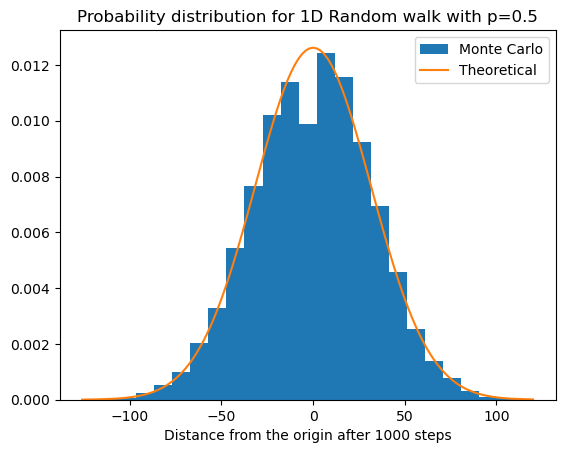

In [27]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True, label = 'Monte Carlo')
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')
plt.legend(loc = 'upper right')

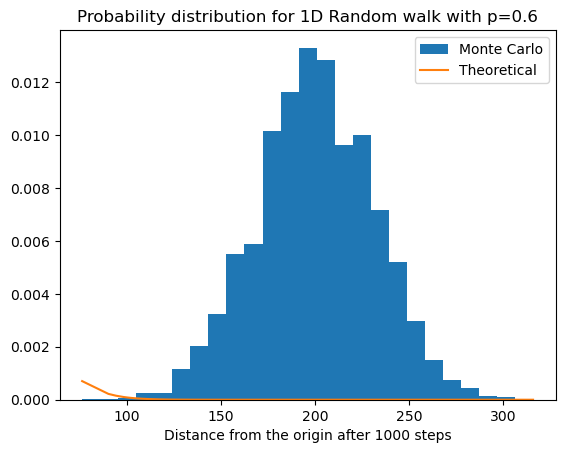

In [29]:
no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True, label = 'Monte Carlo')
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')
plt.legend(loc = 'upper right')

## 2 Estimating \(\pi\)

### 2.1 The method

In [ ]:
# Your code here

### 2.2 A poor but intuitive solution

In [30]:
# Your code here
# throwing one grain at a time

N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

3.14056

### 2.3 A better solution

In [31]:
# Your code here

N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)

3.139052

### 2.4 A smarter solution

In [32]:
# Your code here
# limiting to first quadrant of circle and related square
# same equation still
# range for x and y is [0, 1)

N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.141336

## Exercise 1 :  Vital Stats of Random π

In [42]:
# Your solution here
# 1 and 2

def estimate_pi(n):
    N_total=1_000_000
    x=rnd.rand(N_total)
    y=rnd.rand(N_total)
    N_green=np.sum((x**2+y**2) <= 1)
    return 4 * (N_green / N_total)

run = [estimate_pi(n = 10000) for i in range(100)]
mean = np.mean(run)
std_d = np.std(run)

print(f'The mean is {mean:.3f} and the standard deviation is {std_d:.3f}.')

The mean is 3.142 and the standard deviation is 0.002.


[10, 100, 1000, 10000, 100000]
[3.140608, 3.142, 3.141028, 3.140248, 3.14076, 3.139004, 3.140356, 3.144, 3.141992, 3.142252, 3.141764, 3.139204, 3.140388, 3.141044, 3.138388, 3.139144, 3.14294, 3.13788, 3.140356, 3.143536, 3.141112, 3.14024, 3.1424, 3.139568, 3.142596, 3.141688, 3.139464, 3.141996, 3.142028, 3.143516, 3.139844, 3.141348, 3.14252, 3.140464, 3.141008, 3.144352, 3.1432, 3.144716, 3.139748, 3.1414, 3.145064, 3.140064, 3.142984, 3.139704, 3.139972, 3.139608, 3.145528, 3.141288, 3.143988, 3.139664, 3.14002, 3.140796, 3.142928, 3.14082, 3.143084, 3.141456, 3.141868, 3.142828, 3.143368, 3.144696, 3.141036, 3.140456, 3.14138, 3.14104, 3.143196, 3.142884, 3.139308, 3.140976, 3.139328, 3.138624, 3.141144, 3.14002, 3.142212, 3.1368, 3.141536, 3.140496, 3.139812, 3.140072, 3.143164, 3.140908, 3.139756, 3.142432, 3.142804, 3.142244, 3.143012, 3.140604, 3.144432, 3.142652, 3.139104, 3.139824, 3.144532, 3.144652, 3.141156, 3.143468, 3.144476, 3.144664, 3.14318, 3.143304, 3.139052, 3.1

ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

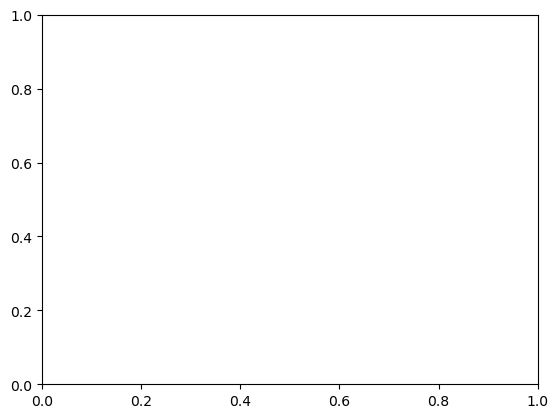

In [214]:
#for i in range(1, 6):
 #   n = 10 ** i
    
n = [10 ** i for i in range(1, 6)]
print(n)

run = [estimate_pi(n) for _ in range(100)] # n here doesn't run all outputs?
print(run)
mean = [np.mean(run)]
#print(mean)
std_d = [np.std(run) for i in range(100)]
#print(std_d)
#pi = [np.pi for np.pi in range(1, 6)]

#print(x)
    #y = [0, mean]
    #print(f'{run}') 
    #print(f'{mean}') 
    #print(f'{std_d}')
    #x_axis = [step]
x_error, y_error = .1, .75
real_value_π = np.pi
    #x = [10 ** i for i in range(1, 6)]
    #y = 
#print(mean)
    
plt.plot(n, mean, color = 'lightblue', linestyle = 'dashed')
#plt.plot(x, pi, color = 'steelblue', marker = 'o')
#plt.plot()
#plt.errorbar(n, std_d, xerr= x_error, yerr = y_error, color = 'steelblue', label = 'Std. Dev. of π values', fmt = 'o')
plt.title('Value of π vs. No. of Points Used')
plt.xscale('log')
plt.xlabel('No. of points used to generate value')
plt.ylabel('Value of π')
plt.show()

In [159]:
import numpy as np

pi = np.pi

print(pi)

#[π for π in range(2)]

1


In [ ]:
test = [1, 2, 3, 4]


In [135]:
[10 ** i for i in range(1, 6)]

[10, 100, 1000, 10000, 100000]